# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
kill = pd.read_csv("C:\\Users\\Burhan\\Downloads\\PoliceKillingsUS.csv", encoding="windows-1252")

In [3]:
print(type(kill))

<class 'pandas.core.frame.DataFrame'>


In [4]:
kill.shape

(2535, 14)

In [5]:
kill.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [7]:
kill.dtypes # To see the data types stired in the csv file.

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

In [6]:
print(kill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

## 1: Plot number of people by gender

In [8]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [9]:
kill.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True
2534,2815,Dwayne Jeune,31/07/17,shot,knife,32.0,M,B,Brooklyn,NY,True,attack,Not fleeing,False


In [29]:
?plt.bar

In [17]:
gender_dist = kill.gender.value_counts(dropna=False)
gender_dist

M    2428
F     107
Name: gender, dtype: int64

### With ```pandas``` 

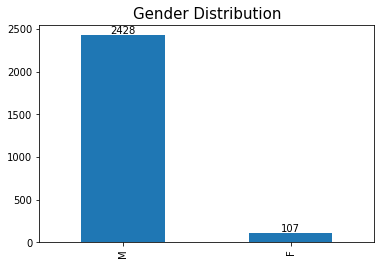

In [30]:
# With Pandas

fig,ax=plt.subplots()
kill.gender.value_counts().plot(kind='bar', ax=ax)

# or
#ax = kill.gender.value_counts().plot(kind='bar')

ax.set_title('Gender Distribution', fontsize=15)
ax.bar_label(ax.containers[0]);

# for p in ax.patches:
#    ax.annotate((p.get_height()),(p.get_x()+.35,p.get_height()+15));

### With ```matplotlib``` 

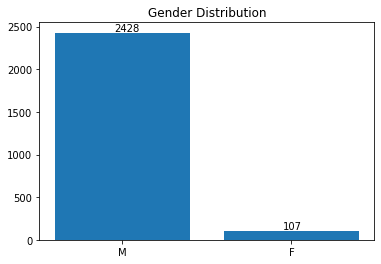

In [29]:
# 1. Object Oriented Method

fig,ax=plt.subplots()
ax.bar(x=gender_dist.index, height=gender_dist.values)
ax.set_title('Gender Distribution')
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+.35,p.get_height()+15));
# ax.annotate((p.get_height()),(p.get_x(),p.get_height())) this code will put the number on top of the bars.

## 2: Plot 7 most common kill weapons

In [31]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [42]:
# We will use Slicing to bring the first 7 methods

kill.armed.value_counts(dropna=False)[:7]

# or
# kill.armed.value_counts(dropna=False).head(7)

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

### With ```matplotlib``` 

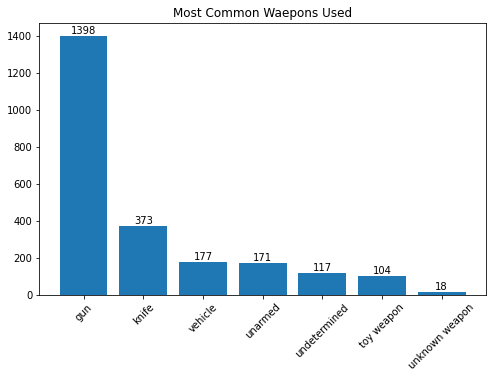

In [93]:
fig,ax=plt.subplots(figsize=(8,5))

ax.bar(x=kill.armed.value_counts(dropna=False)[:7].index, height=kill.armed.value_counts(dropna=False)[:7].values)

ax.set_title('Most Common Waepons Used')
ax.set_xticklabels(labels=kill.armed.value_counts(dropna=False)[:7].index, rotation=45)
ax.bar_label(ax.containers[0]);

# kill.armed.value_counts(dropna=False)[:7].index -- This code produces our x values.

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25
To solve this problem we need two age categories, above 25 and under 25.

In [53]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [56]:
kill['age_cat']=['above25' if i > 25 else 'below25' for i in kill.age] # To add 'age-cat' column.

In [57]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age-cat,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25,above25


In [58]:
kill.age_cat.value_counts()

above25    1905
below25     630
Name: age_cat, dtype: int64

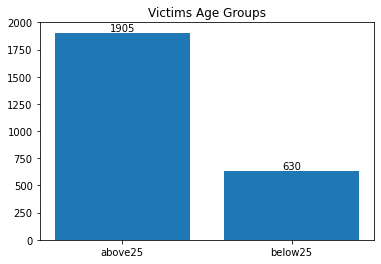

In [88]:
# with matplotlib
fig, ax=plt.subplots()
ax.bar(x=kill.age_cat.value_counts().index, height=kill.age_cat.value_counts())
ax.set_title('Victims Age Groups')
ax.bar_label(ax.containers[0]);

## 4: Plot number of killed poeple by race

In [71]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [76]:
race_freq = kill.race.value_counts()
race_freq

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

### With ```matplotlib```

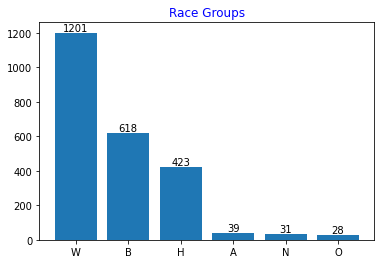

In [94]:
fig,ax=plt.subplots()
ax.bar(x=race_freq.index, height=race_freq)
# plt.title('Race Groups')
ax.set_title('Race Groups', color='blue')
# or
# plt.title('Race Groups')
ax.bar_label(ax.containers[0]);


### With ```pandas```

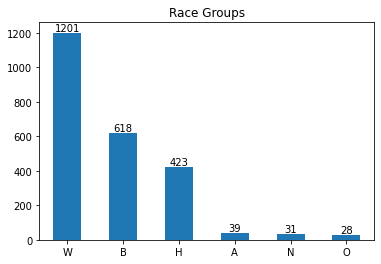

In [99]:
fig,ax=plt.subplots()
kill.race.value_counts().plot(kind='bar', ax=ax)
# or
#ax = kill.race.value_counts().plot(kind='bar')
ax.set_title('Race Groups')
ax.bar_label(ax.containers[0]);
ax.set_xticklabels(labels=race_freq.index, rotation=0);

## 5: Killed People According to Races (Pie Chart)

In [101]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age-cat,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25,above25


In [102]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [104]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

Use ```inplace```

In [108]:
kill.dropna(inplace=True) # With inplace we change the data itself.

In [107]:
kill.shape

(2254, 16)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [109]:
kill.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [130]:
labels_1 = kill.race.value_counts().index
labels_1

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [131]:
values_1 = kill.race.value_counts().values
values_1

array([1168,  592,  401,   36,   29,   28], dtype=int64)

### With ```pandas```

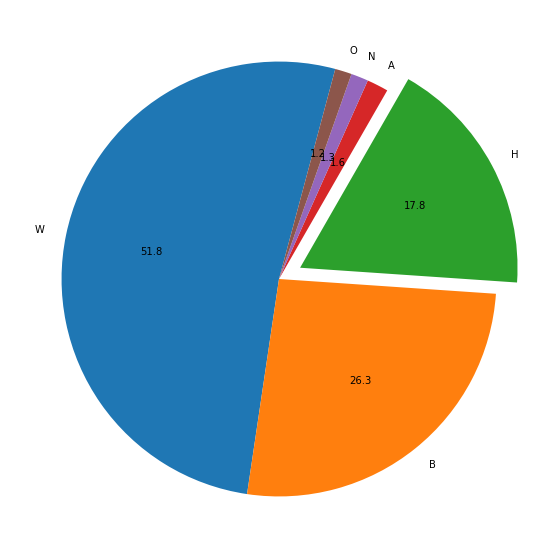

In [153]:
# matplotlib
fig,ax=plt.subplots(figsize=(10,10))
ax.pie(x=values_1, explode=(0,0,.11,0,0,0),
       labels=labels_1, autopct="%.1f", radius=1, startangle=75);

# For explode, the index number needs to match with the number in the list. H is at 3rd place in the list.
